## Exploratory Data Analysis

In [15]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# creating Path object for current working directory
directory = Path('./')
# creating Path object for additional data directory
additional_directory = directory / 'additional_data'
# create new directory for additional data
Path(additional_directory).mkdir(exist_ok=True)

# defining the directory to original data
directory = Path('./data/')
additional_directory = Path('./additional_data')

# list the .csv files for the project
for file in directory.glob('*.csv'):
    print(file)
    
# reading in .csv files to dataframes
vehicles = pd.read_csv(directory / 'vehicles2019.csv', dtype={'Accident_Index': str})
casualties = pd.read_csv(directory / 'casualties2019.csv', dtype={'Accident_Index': str})
# cleaned accidents DataFrame
accidents = pd.read_pickle('accidents_cleaned.pkl')

# convert column names to lowercase for ease of indexing
def lower_columns(df):
    """
    Defintion:
        convert column names to lower case
    """
    df.columns = map(str.lower, df.columns)
    
# converting all column names to lower case
lower_columns(vehicles)
lower_columns(casualties)

accidents.head(5)

data/vehicles2019.csv
data/accidents2019.csv
data/casualties2019.csv


,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,district,converted_date,converted_time,datetime,decimal_time,day_of_year
0,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,0,1,3,E01003117,lambeth,2019-01-15,21:45:00,2019-01-15 21:45:00,21.750000,15
1,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,0,1,1,E01003023,lambeth,2019-01-15,08:42:00,2019-01-15 08:42:00,8.700000,15
2,2019010157732,-0.145106,51.461256,1,2,1,2,3,9,E09000022,...,0,1,1,E01003026,lambeth,2019-01-15,07:08:00,2019-01-15 07:08:00,7.133333,15
3,2019010157896,-0.240823,51.533125,1,3,2,1,3,28,E09000005,...,0,1,1,E01000535,brent,2019-01-15,21:05:00,2019-01-15 21:05:00,21.083333,15
4,2019010157795,0.161736,51.550272,1,3,1,1,3,16,E09000002,...,0,1,1,E01000035,barking and dagenham,2019-01-15,16:10:00,2019-01-15 16:10:00,16.166667,15


[Text(0.5, 0, 'Time of day'),
 Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 1.0, 'Total number of accidents by time of day.')]

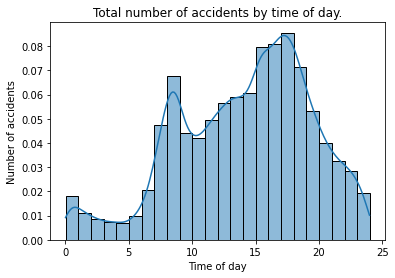

In [16]:
ax = sns.histplot(data=accidents,
             x='decimal_time',
             binwidth=1,
             kde=True,
             stat='density')
ax.set(xlabel='Time of day',
       ylabel='Number of accidents',
       title='Total number of accidents by time of day.')

[<matplotlib.axis.XTick object at 0x7ff48d2af850>, <matplotlib.axis.XTick object at 0x7ff48d2af820>, <matplotlib.axis.XTick object at 0x7ff48d260be0>, <matplotlib.axis.XTick object at 0x7ff48d2263a0>, <matplotlib.axis.XTick object at 0x7ff48d226af0>, <matplotlib.axis.XTick object at 0x7ff48d22b280>, <matplotlib.axis.XTick object at 0x7ff48d22b9d0>, <matplotlib.axis.XTick object at 0x7ff48d231160>, <matplotlib.axis.XTick object at 0x7ff48d22bc70>]


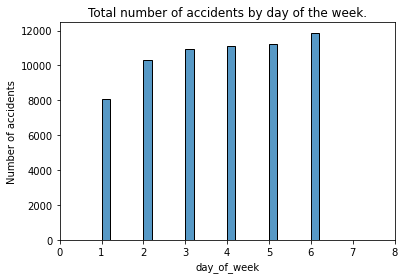

In [17]:
days = ['Mon', 'Tue', 'Wed',
        'Thu', 'Fri', 'Sat',
        'Sun']

ax = sns.histplot(data=accidents,
             x='day_of_week',
             binwidth=.2)
ax.set(ylabel='Number of accidents',
       xlim=(0, 8),
       title='Total number of accidents by day of the week.')

print(ax.xaxis.get_major_ticks())